Лабораторная работа 3. Обучение с учителем. Задача регрессии
ЗАДАНИЕ.
1. В соответствии с индивидуальным вариантом загрузить датасет (см. ML 3 semestr datasets) для решения задачи регрессии, выполнить предварительную обработку и разведочный анализ данных (EDA).
2. Выделить целевой признак и предикторы, разбить данные на обучающую и тестовую выборку.
3. Решить задачу регрессии на ваших данных с использованием моделей sklearn (простая линейная регрессия + L1, L2; множественная линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.
4. Решить задачу регрессии на ваших данных с использованием моделей sklearn (Полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.
5. Вычислить значения метрик R2, MAE, MSE, RMSE, MAPE для всех обученных моделей. Выбрать лучшую модель.
6. Реализовать пайплайн при построении модели регрессии.
7. *Самостоятельно реализовать вычисление всех используемых метрик (в виде функций, принимающих два аргумента). Привести в таблице метрики, вычисленные с использование библиотеки Scikit-learn и соответствующими пользовательскими функциями.

Импортирую все что мне нужно

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

## Предварителная обработка и EDA

Читаю датафреймы и добавляю к ним столбец цвет, который будет отвечать за цвет вина, красное-6, белое -7

In [2]:
df1 = pd.read_csv(r"winequality-red.csv",decimal=",",delimiter=";")
df2 = pd.read_csv(r"winequality-white.csv",decimal=",",delimiter=";")
df1.insert (loc= len(df1.columns) , column='color', value=6)
df2.insert (loc= len(df2.columns) , column='color', value=7)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,7
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,7
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,7
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,7
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,7
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,7
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,7
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,7


Обьединяю два датафрейма уже с новыми индексами

In [3]:
data = pd.concat([df1, df2], axis = 0,ignore_index = True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,6
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,6
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,6
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,7
6493,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,7
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,7
6495,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         6497 non-null   object
 1   volatile acidity      6497 non-null   object
 2   citric acid           6497 non-null   object
 3   residual sugar        6497 non-null   object
 4   chlorides             6497 non-null   object
 5   free sulfur dioxide   6497 non-null   object
 6   total sulfur dioxide  6497 non-null   object
 7   density               6497 non-null   object
 8   pH                    6497 non-null   object
 9   sulphates             6497 non-null   object
 10  alcohol               6497 non-null   object
 11  quality               6497 non-null   int64 
 12  color                 6497 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 660.0+ KB


In [5]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
color                   0.0
dtype: float64

Меняем типы данных в некоторых столбцах раз нет пропусков

In [6]:
data['fixed acidity'] = data['fixed acidity'].astype(float)
data['volatile acidity'] = data['volatile acidity'].astype(float)
data['citric acid'] = data['citric acid'].astype(float)
data['residual sugar'] = data['residual sugar'].astype(float)
data['chlorides'] = data['chlorides'].astype(float)
data['free sulfur dioxide'] = data['free sulfur dioxide'].astype(float)
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype(float)
data['density'] = data['density'].astype(float)
data['pH'] = data['pH'].astype(float)
data['sulphates'] = data['sulphates'].astype(float)
data['alcohol'] = data['alcohol'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Получился датасет только с числовыми данными, без пропусков

In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

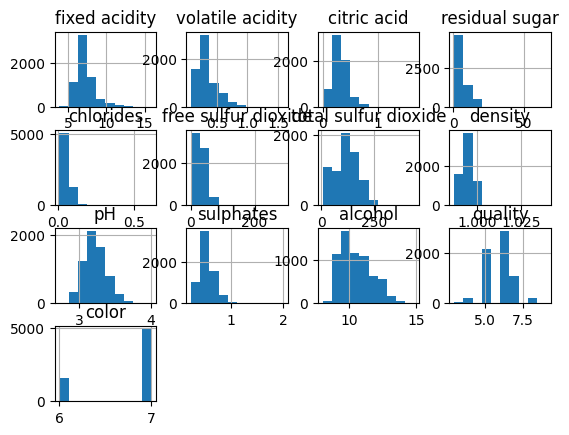

In [8]:
data.hist()

Избавляемся от дубликатов

In [9]:
data.duplicated().sum()

np.int64(1177)

In [10]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

Избавляемся от выбросов с использованием метода межквартильного размаха

In [11]:
outlier=x = data.drop(["color", "quality"], axis=1)#удаляем не числовые данные
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3 - Q1
data_f = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]#оставляем только строки без выбросов
index_list = list(data_f.index.values)
data_f = data[data.index.isin(index_list)]
data=data_f

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

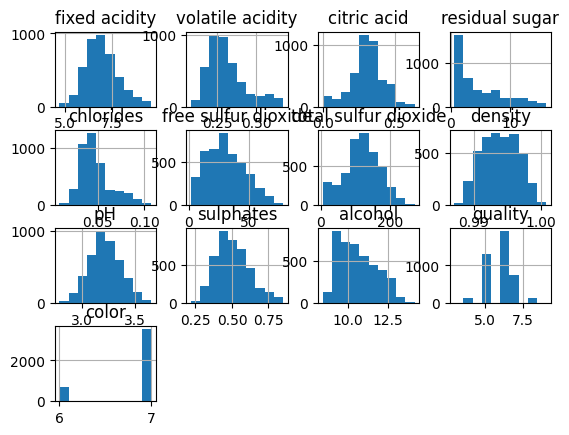

In [12]:
data.hist()

In [13]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.142915,0.222573,-0.044380,0.317288,-0.180752,-0.165080,0.369462,-0.257290,0.133452,-0.118289,-0.101360,-0.332071
volatile acidity,0.142915,1.000000,-0.437851,-0.115766,0.479483,-0.309446,-0.326788,0.254696,0.213307,0.197716,-0.051003,-0.207823,-0.613549
citric acid,0.222573,-0.437851,1.000000,0.152115,-0.199068,0.190787,0.257796,-0.004357,-0.254110,-0.035054,0.044840,0.102361,0.289033
residual sugar,-0.044380,-0.115766,0.152115,1.000000,-0.093635,0.419787,0.470908,0.568630,-0.222851,-0.135201,-0.314501,-0.050386,0.282336
chlorides,0.317288,0.479483,-0.199068,-0.093635,1.000000,-0.216588,-0.287739,0.554114,0.239495,0.328429,-0.390385,-0.277059,-0.719832
free sulfur dioxide,-0.180752,-0.309446,0.190787,0.419787,-0.216588,1.000000,0.690474,0.114415,-0.150050,-0.137457,-0.177394,0.083160,0.398202
total sulfur dioxide,-0.165080,-0.326788,0.257796,0.470908,-0.287739,0.690474,1.000000,0.150206,-0.210679,-0.187339,-0.284416,-0.065004,0.620572
density,0.369462,0.254696,-0.004357,0.568630,0.554114,0.114415,0.150206,1.000000,0.117482,0.234325,-0.755292,-0.348460,-0.371288
pH,-0.257290,0.213307,-0.254110,-0.222851,0.239495,-0.150050,-0.210679,0.117482,1.000000,0.276824,0.020809,0.053701,-0.356888
sulphates,0.133452,0.197716,-0.035054,-0.135201,0.328429,-0.137457,-0.187339,0.234325,0.276824,1.000000,-0.041435,0.042733,-0.421705


## Простая линейная регрессия

![linreg](C:/Users/Anastasia/Pictures/Screenshots/linreg.png)

Сделаем пайплайн,который обьединяет несколько шагов обработки данных и модель мо в единую послеовательность

In [14]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),#масштабируем данные, чтобы они находились в диапазоне от 0 до 1.
        ('model', LinearRegression()),#после предобработки будит использована модель линейной регрессии
    ]
)


Целевой признак (то,что хотим предсказать) качество, предиктором (какая то характеристика, которую будем использовать для предсказания) будет alcohol

In [15]:
y = pd.DataFrame(data["quality"])
x = pd.DataFrame(data["alcohol"])

Разделим на обучающую и тестовую выборки 80\20

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Обучим модель и сделаем прогноз

In [17]:
lr = pipeline.fit(x_train, y_train)

y_pred = pd.DataFrame(lr.predict(x_test))

Оценим модель по графику.



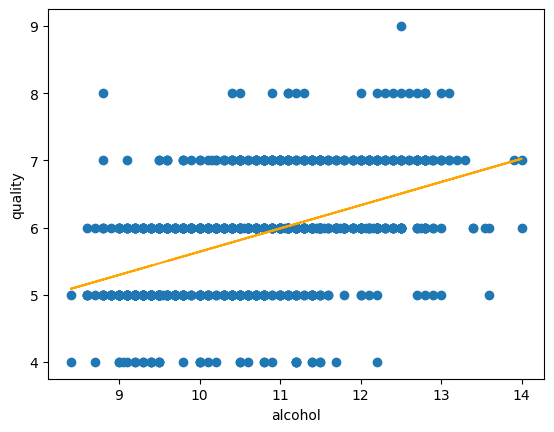

In [18]:
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

Модель попыталась, но в данном случае одного алкоголя оказалось недостаточно, посмотрим на метрики

![mert](C:/Users/Anastasia/Pictures/Screenshots/metr.png)

In [19]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(x_test, y_test)}')

MAE: 0.6153911652563718
MSE: 0.5942221557159777
RMSE: 0.7708580645721868
MAPE: 0.10928232498441368
R^2: 0.22057592678040816


Коэффицент детиерминации очень низкий

Теперь воспользуемся регуляризацией L1 лассо

Регуляризация - это наложение дополнительных ограничений на значения переменных (весов). Цель регуляризации - предотвращение так называемого переобучения.
Используемая функция потерь:

![l1](C:/Users/Anastasia/Pictures/Screenshots/l1.png)

Сделаем пайплайн для лассо и найдём наилучшие параметры с помощью поиска по сетке.



In [20]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params


{'model__alpha': np.float64(0.1)}

Обучим модель с помощью регуляризатора лассо и оптимального параметра

MAE: 0.6827360219340579
MSE: 0.762388910989154
RMSE: 0.8731488481290884
MAPE: 0.12161806087065227
R^2: -3.558710521378572e-06


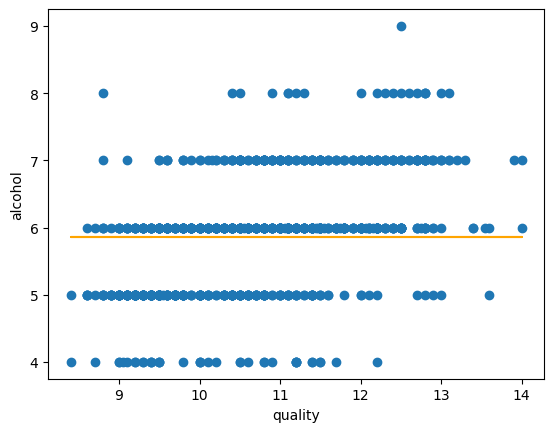

In [21]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

Модель стала хуже, теперь это константное предсказание

теперь воспользуемся ридж

In [22]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': np.float64(0.2)}

MAE: 0.6154112406255507
MSE: 0.5942330574835748
RMSE: 0.7708651357297039
MAPE: 0.10928726860532458
R^2: 0.22056162724609396


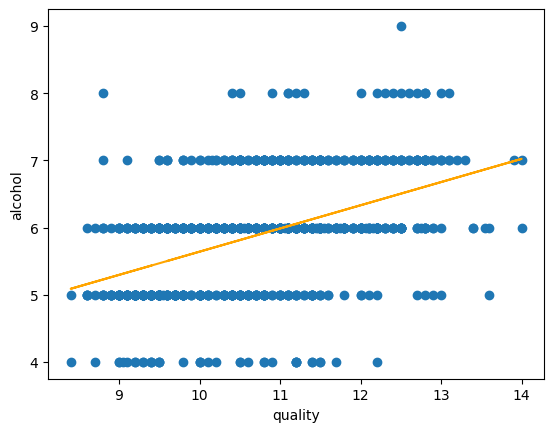

In [23]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

ридж сработал гораздо лчше чем лассо, но по сути ситацию никак не изменил

Теперь воспольземся эластик нэт

In [24]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet())
    ]
)
param_grid = {
    "model__alpha": [0.1, 0.5, 1, 5, 30],
    "model__l1_ratio": np.arange(0.1, 1, 0.1),
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': np.float64(0.1)}

MAE: 0.6403340221180914
MSE: 0.6811227349351242
RMSE: 0.8253016024067348
MAPE: 0.11423152955557822
R^2: 0.10659094192483953


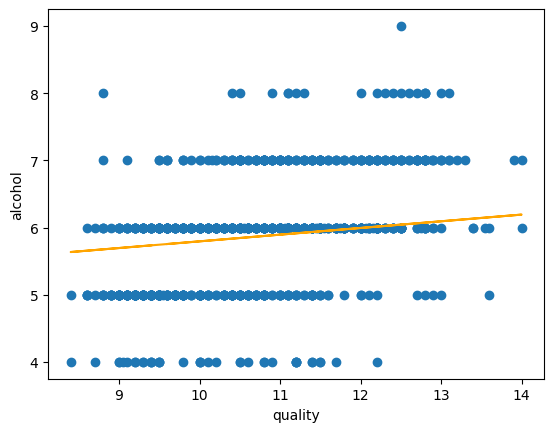

In [25]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

Получилось что эластик нэт показал результат средний между ридж и лассо

Лучшая модель- либо без регуляризатора, либо с регуляризатором ридж.

## Множественная линейная регрессия

In [26]:
y = data["quality"]
x = data.drop("quality", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

обучим модель множественной линейной регрессии без регуляризатора

In [27]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression()),
    ]
)
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

посмотрим коэффиценты модели

In [28]:
pipeline.named_steps["model"].coef_

array([ 0.13041961, -0.16139262,  0.01272408,  0.33760108, -0.05058538,
        0.1303006 , -0.06190873, -0.47043497,  0.17071339,  0.11245163,
        0.16680516, -0.189611  ])

In [29]:
y_pred = pipeline.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.5349307374788711
MSE: 0.4826086225642099
RMSE: 0.6947003833050691
MAPE: 0.09415580180914192
R^2: 0.33445978480024563


Коэффицент детерминации уже выше, значит модель более точна, но это все равно очень низкий результат, попробуем использовать лассо

строим пайплайн и подбираем коэффиценты

In [30]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': np.float64(0.2)}

In [31]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007580,0.001850,0.003193,0.000748,0.2,{'model__alpha': 0.2},-0.001528,-0.000896,-0.006312,-0.000253,-0.000969,-0.001992,0.002198,1
1,0.005585,0.000488,0.002992,0.000631,0.4,{'model__alpha': 0.4},-0.001528,-0.000896,-0.006312,-0.000253,-0.000969,-0.001992,0.002198,1
2,0.004590,0.000487,0.002794,0.000401,0.6,{'model__alpha': 0.6000000000000001},-0.001528,-0.000896,-0.006312,-0.000253,-0.000969,-0.001992,0.002198,1
3,0.005386,0.000995,0.002195,0.000399,0.8,{'model__alpha': 0.8},-0.001528,-0.000896,-0.006312,-0.000253,-0.000969,-0.001992,0.002198,1
4,0.006783,0.001935,0.002793,0.000745,1.0,{'model__alpha': 1.0},-0.001528,-0.000896,-0.006312,-0.000253,-0.000969,-0.001992,0.002198,1


подставим гмперпараметр в модель и обучим ее

In [32]:
pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6561920349154392
MSE: 0.7255733119184244
RMSE: 0.8518059121175577
MAPE: 0.11638766489011988
R^2: -0.000600063031692466


Лассо опять свела модель к константномуу предсказанию. Попробуем с ридж регуляризацией

In [33]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': np.float64(0.2)}

In [34]:
pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.5349056341125937
MSE: 0.4823717572243962
RMSE: 0.6945298821680721
MAPE: 0.09414451267029858
R^2: 0.3347864333553323


Ридж опять показал себя неплохо(относительно лассо), пробуем эластик нет

In [35]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__l1_ratio": np.arange(0.2, 1, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6561920349154392
MSE: 0.7255733119184244
RMSE: 0.8518059121175577
MAPE: 0.11638766489011988
R^2: -0.000600063031692466


у меня модели видимо просто говорят: "4"

## Полиномиальная регрессия

Буду использовать множественную регрессию

In [36]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", LinearRegression()),
        
    ]
)

In [37]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

from sklearn.svm import SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, y_train).score(x_test, y_test)

MAE: 0.5267455854146857
MSE: 0.4633739738140671
RMSE: 0.6807157804943758
MAPE: 0.09267930564989671
R^2: 0.36098527910336187


0.5709219858156028

Я попробовала степень 2, 3, 4, 5 и самая эффективная-2, будем использовать ее в следующих моделях

воспользуемся лассо

In [38]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6561920349154392
MSE: 0.7255733119184244
RMSE: 0.8518059121175577
MAPE: 0.11638766489011988
R^2: -0.000600063031692466


лаccо не справилось, следующее ридж

In [39]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.5239166156877579
MSE: 0.4565341151381812
RMSE: 0.6756730830351179
MAPE: 0.09210295805161921
R^2: 0.37041776912166724


Эластик нэт

In [40]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6169614636226041
MSE: 0.6420250663473508
RMSE: 0.8012646668531883
MAPE: 0.10967812677796908
R^2: 0.11461693628649983


В общем зачете побеждает модель полиномиальной регрессии со степенью 2 без регуляризации, хотя победой это назвать сложно, ридж регуляризация почти не влияла на результат, а лассо сводила модель к константному предсказанию